In [1]:
import numpy as np
import importlib
import h5py
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("ticks")

In [2]:
areas = ['V1', 'LM', 'RL', 'AL',  'PM', 'AM']

# load anatomical data

In [4]:
path_anatomy = '/Users/xiaoxuanj/Documents/presentations/ephys_platform_paper/figures/figure3_anatomy_CC/'

In [5]:
data = np.load(path_anatomy+'hscorediff_CortexLGNLP_CutCortex.npy')

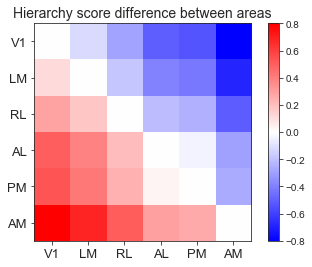

In [9]:
plt.imshow(data, cmap='bwr', vmax=0.8, vmin=-0.8)
plt.xticks(range(6),areas, fontsize=13)
plt.yticks(range(6),areas, fontsize=13)
plt.colorbar()
plt.title('Hierarchy score difference between areas', fontsize=14)
#plt.savefig(path_anatomy+'tmp.pdf')
plt.savefig('/Users/xiaoxuanj/work/work_allen/Ephys/figures/platform_paper/functional_connectivity/anatomical.pdf')


# load functional data

In [10]:
path_function = '/Users/xiaoxuanj/work/work_allen/Ephys/processed_data/adjacency_matrix/'
#data_f = np.load(path_function+'ccg_peak_offset_tmp20190709_limit20ms.npy')


In [11]:
#[data_f, N_connection] = np.load(path_function+'FC_paper090419.npy')
[COUNT, CCG_amp, data_f] = np.load(path_function+'FC_area_25mice_710std_resorted_high.npy')

In [12]:
data_f

array([[ 0.        , -2.75      , -0.31818182, -3.34375   , -3.0625    ,
        -5.69230769],
       [ 3.        ,  0.025     ,  2.31818182,  0.32142857, -1.        ,
        -3.55555556],
       [ 0.5       , -1.29166667,  0.        , -3.91666667, -3.83333333,
        -1.25      ],
       [ 3.26666667, -0.10714286,  4.08333333,  0.025     ,  0.35714286,
        -2.23076923],
       [ 3.375     ,  1.75      ,  4.16666667, -0.5       ,  0.        ,
        -1.31818182],
       [ 6.46666667,  2.5       ,  1.95      ,  2.46153846,  1.72727273,
         0.02173913]])

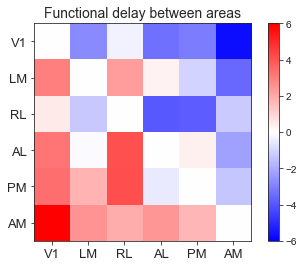

In [13]:
plt.imshow(data_f, cmap='bwr', vmax=6, vmin=-6)
plt.xticks(range(6),areas, fontsize=13)
plt.yticks(range(6),areas, fontsize=13)
plt.colorbar()
plt.title('Functional delay between areas', fontsize=14)
plt.savefig('/Users/xiaoxuanj/work/work_allen/Ephys/figures/platform_paper/functional_connectivity/functional_25.pdf')


In [14]:
np.corrcoef(data.flatten(), data_f.flatten())

array([[1.        , 0.81141051],
       [0.81141051, 1.        ]])

In [22]:
from scipy.stats import linregress, pearsonr, spearmanr

x = data.flatten()
y = data_f.flatten()

r_s,p_s = spearmanr(x,y)
r_p,p_p = pearsonr(x,y)

text = '$r_S$ = ' + str(np.around(pow(r_s,1),2)) + '; $P_S$ = ' + str(np.around(p_s,10)) + '\n' + \
          '$r_P$ = ' + str(np.around(pow(r_p,1),2)) + '; $P_P$ = ' + str(np.around(p_p,10))
    
print(text)

$r_S$ = 0.78; $P_S$ = 1.98e-08
$r_P$ = 0.81; $P_P$ = 1.9e-09


In [16]:
p_s

1.9781914579730135e-08

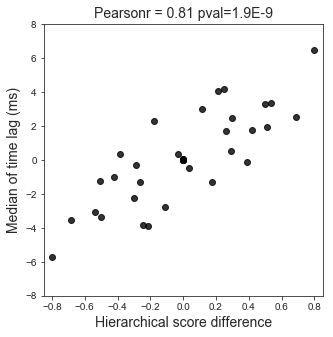

In [21]:
plt.figure(figsize=(5,5))
plt.scatter(data.flatten(), data_f.flatten(), c='k', alpha=0.8)
plt.xlim([-0.85, 0.85])
plt.ylim([-8,8])
plt.title('Pearsonr = '+str(0.81)+' pval=1.9E-9', fontsize=14)
plt.xlabel('Hierarchical score difference', fontsize=14)
plt.ylabel('Median of time lag (ms)', fontsize=14)
#plt.savefig(path_anatomy+'mice27_6area_7std10ms_resorted_anatomy_function_corr.pdf')
plt.savefig('/Users/xiaoxuanj/work/work_allen/Ephys/figures/platform_paper/functional_connectivity/anatomy_function_corr.pdf')
